## Facial Image clustering and classification

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [15,8]

In [2]:
from sklearn.datasets import fetch_olivetti_faces
olivetti = fetch_olivetti_faces()

In [3]:
images = olivetti.images

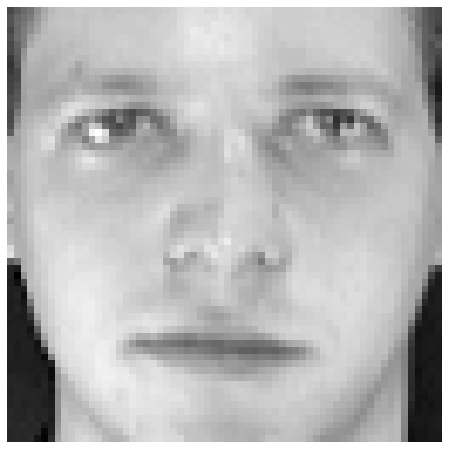

In [7]:
plt.imshow(images[0], cmap= 'gray')
plt.axis('off')
plt.show()

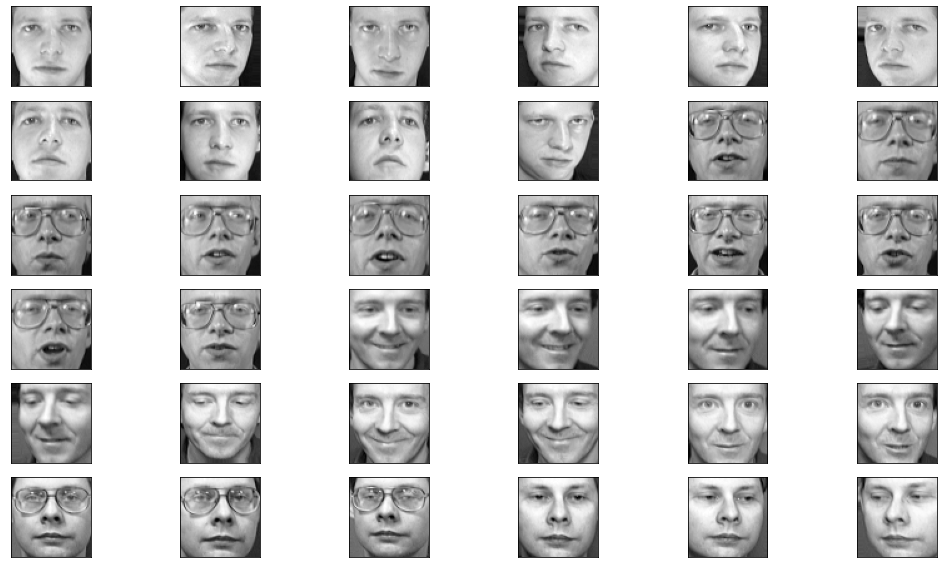

In [8]:
for i in range(36):
    plt.subplot(6, 6, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(images[i], cmap = 'gray')
plt.tight_layout()
plt.show()

In [9]:
data = olivetti.data
target = olivetti.target

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
strat_split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2)
train_valid_idx, test_idx = next(strat_split.split(data, target))

In [14]:
X_train_valid = data[train_valid_idx]
y_train_valid = target[train_valid_idx]
X_test = data[test_idx]
y_test = target[test_idx]

In [15]:
strat_split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))

In [16]:
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

X_train.shape

(256, 4096)

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.99)
X_train_pca = pca.fit_transform(X_train)
pca.n_components_

188

In [18]:

X_test_pca = pca.transform(X_test)

In [19]:
from sklearn.cluster import KMeans

In [20]:

k_range = range(5, 150, 5)
kmeans_per_k = []

for k in k_range:
    print("k = {}".format(k))
    kmeans = KMeans(n_clusters = k).fit(X_train_pca)
    kmeans_per_k.append(kmeans)

k = 5
k = 10
k = 15
k = 20
k = 25
k = 30
k = 35
k = 40
k = 45
k = 50
k = 55
k = 60
k = 65
k = 70
k = 75
k = 80
k = 85
k = 90
k = 95
k = 100
k = 105
k = 110
k = 115
k = 120
k = 125
k = 130
k = 135
k = 140
k = 145


In [21]:
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(X_train_pca, model.labels_) for model in kmeans_per_k]

In [22]:
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

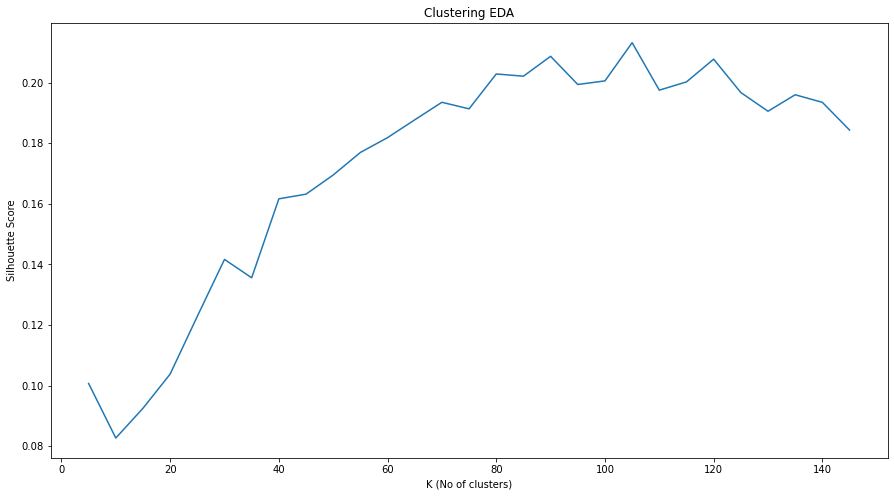

In [23]:
plt.plot(k_range, silhouette_scores)
plt.xlabel('K (No of clusters)')
plt.ylabel('Silhouette Score')
plt.title('Clustering EDA')
plt.show()


In [24]:
inertias = [model.inertia_ for model in kmeans_per_k]
best_inertia = inertias[best_index]

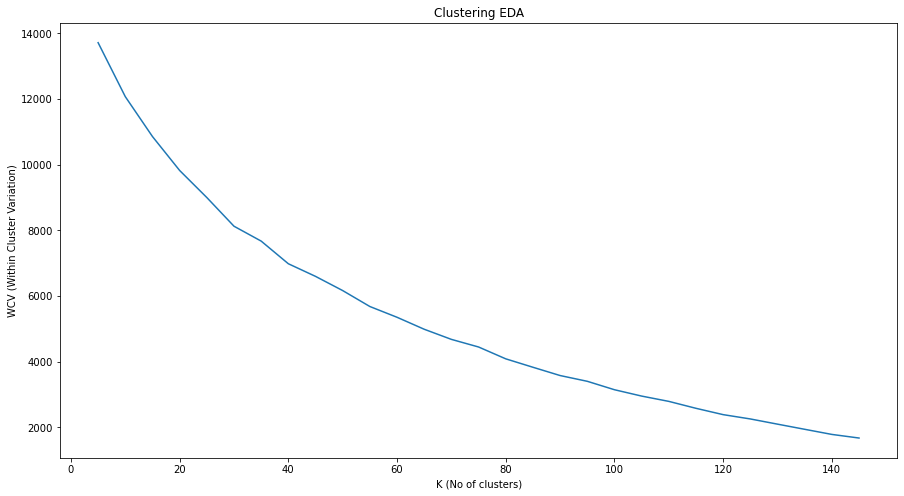

In [25]:
plt.plot(k_range, inertias)
plt.xlabel('K (No of clusters)')
plt.ylabel('WCV (Within Cluster Variation)')
plt.title('Clustering EDA')
plt.show()

In [26]:
best_model = kmeans_per_k[best_index]
best_model

KMeans(n_clusters=105)

In [27]:
best_model.fit(X_train_pca)
y_labels = best_model.labels_

In [31]:
cluster_frequencies = pd.Series(y_labels).value_counts()
cluster_32 = X_train[y_labels == 32]
print(cluster_frequencies)

1     8
32    6
53    5
49    5
24    5
     ..
78    1
77    1
76    1
71    1
82    1
Length: 105, dtype: int64


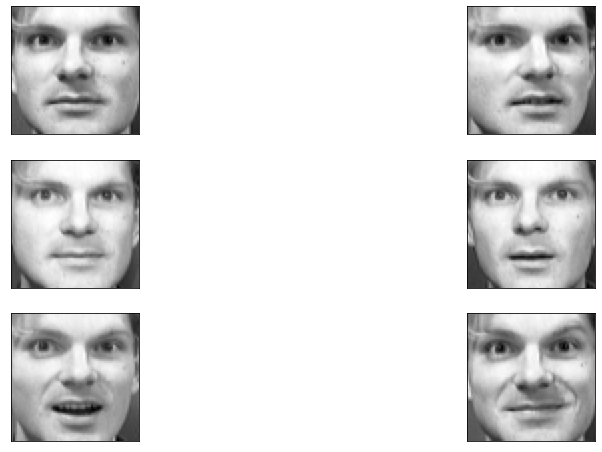

In [33]:
for i in range(6):
    plt.subplot(3, 2, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(cluster_32[i].reshape(64, 64), cmap = 'gray')
plt.show()

In [34]:
def plot_facial_images(faces, labels, n_cols = 5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.5))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap = 'gray')
        plt.axis('off')
        plt.title(label)
    plt.show()

Cluster 0


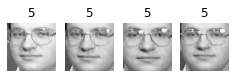

Cluster 1


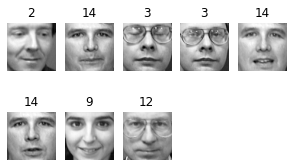

Cluster 2


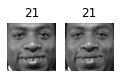

Cluster 3


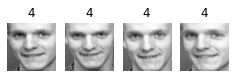

Cluster 4


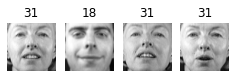

Cluster 5


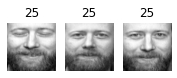

Cluster 6


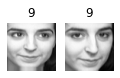

Cluster 7


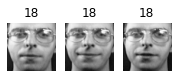

Cluster 8


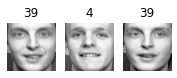

Cluster 9


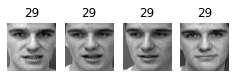

Cluster 10


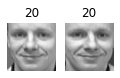

Cluster 11


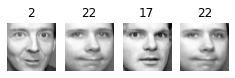

Cluster 12


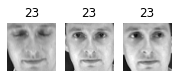

Cluster 13


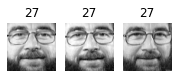

Cluster 14


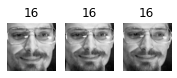

Cluster 15


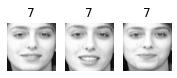

Cluster 16


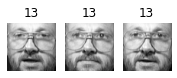

Cluster 17


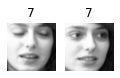

Cluster 18


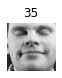

Cluster 19


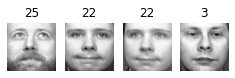

Cluster 20


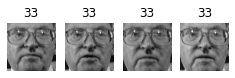

Cluster 21


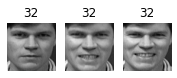

Cluster 22


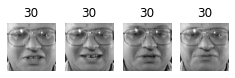

Cluster 23


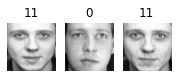

Cluster 24


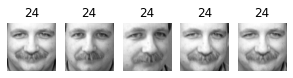

Cluster 25


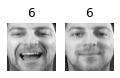

Cluster 26


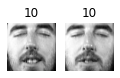

Cluster 27


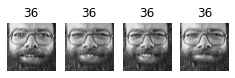

Cluster 28


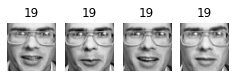

Cluster 29


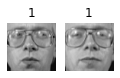

Cluster 30


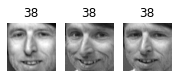

Cluster 31


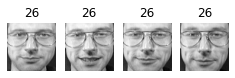

Cluster 32


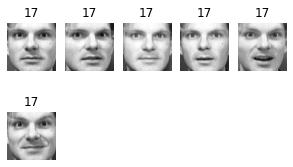

Cluster 33


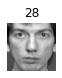

Cluster 34


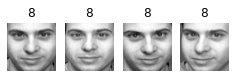

Cluster 35


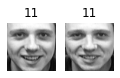

Cluster 36


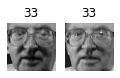

Cluster 37


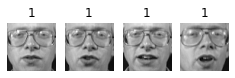

Cluster 38


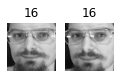

Cluster 39


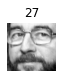

Cluster 40


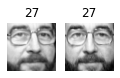

Cluster 41


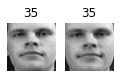

Cluster 42


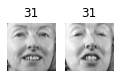

Cluster 43


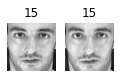

Cluster 44


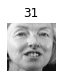

Cluster 45


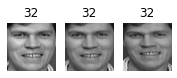

Cluster 46


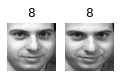

Cluster 47


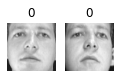

Cluster 48


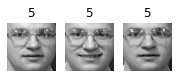

Cluster 49


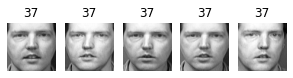

Cluster 50


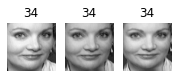

Cluster 51


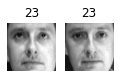

Cluster 52


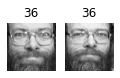

Cluster 53


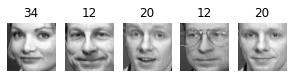

Cluster 54


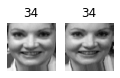

Cluster 55


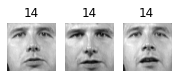

Cluster 56


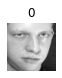

Cluster 57


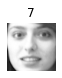

Cluster 58


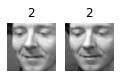

Cluster 59


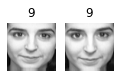

Cluster 60


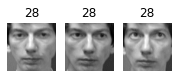

Cluster 61


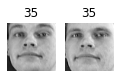

Cluster 62


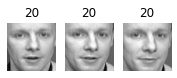

Cluster 63


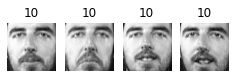

Cluster 64


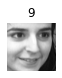

Cluster 65


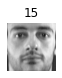

Cluster 66


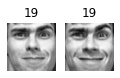

Cluster 67


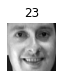

Cluster 68


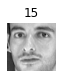

Cluster 69


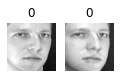

Cluster 70


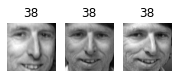

Cluster 71


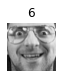

Cluster 72


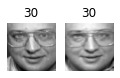

Cluster 73


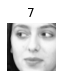

Cluster 74


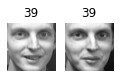

Cluster 75


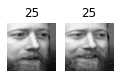

Cluster 76


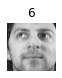

Cluster 77


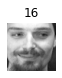

Cluster 78


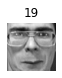

Cluster 79


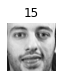

Cluster 80


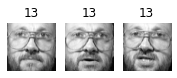

Cluster 81


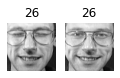

Cluster 82


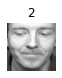

Cluster 83


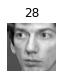

Cluster 84


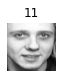

Cluster 85


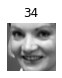

Cluster 86


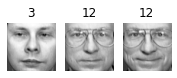

Cluster 87


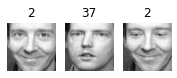

Cluster 88


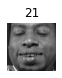

Cluster 89


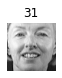

Cluster 90


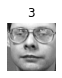

Cluster 91


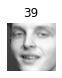

Cluster 92


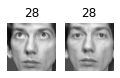

Cluster 93


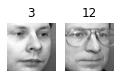

Cluster 94


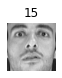

Cluster 95


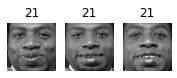

Cluster 96


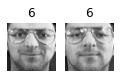

Cluster 97


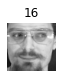

Cluster 98


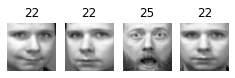

Cluster 99


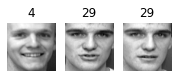

Cluster 100


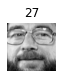

Cluster 101


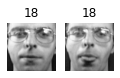

Cluster 102


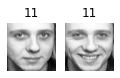

Cluster 103


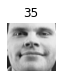

Cluster 104


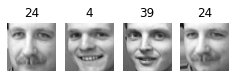

In [35]:
for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_ == cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_facial_images(faces, labels)

In [36]:
X_train_recovered = pca.inverse_transform(X_train_pca)

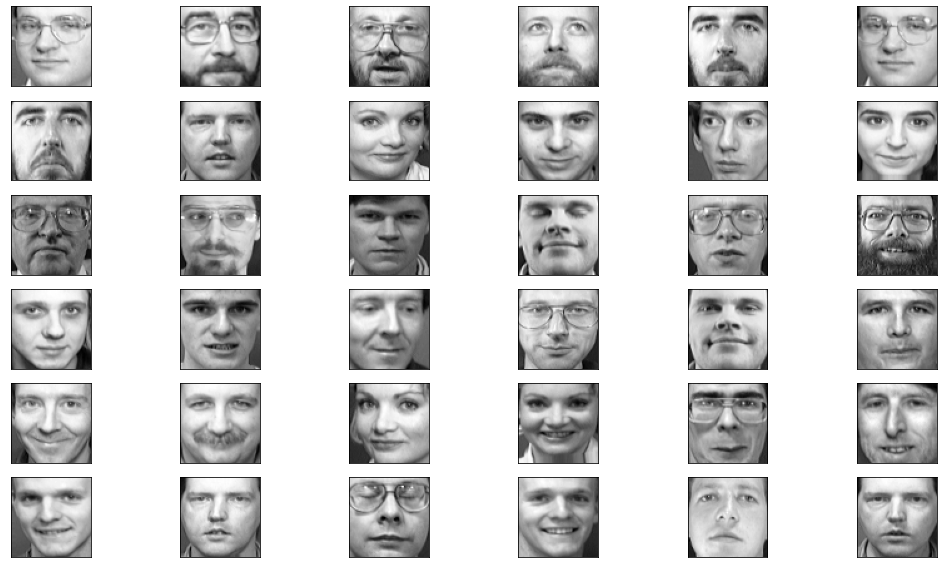

In [37]:
for i in range(36):
    plt.subplot(6, 6, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i].reshape(64, 64), cmap = 'gray')
plt.tight_layout()
plt.show()

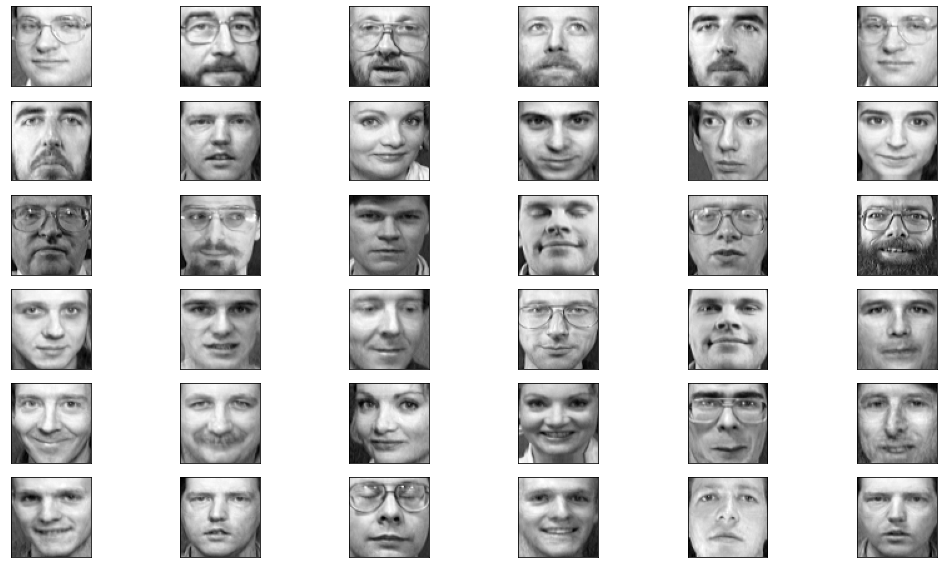

In [38]:
for i in range(36):
    plt.subplot(6, 6, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train_recovered[i].reshape(64, 64), cmap = 'gray')
plt.tight_layout()
plt.show()

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 11)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=11)

In [40]:
rf.score(X_train, y_train) # 100%

1.0

In [41]:
rf.score(X_test, y_test)

0.9

In [42]:

y_pred_rf = rf.predict(X_test)

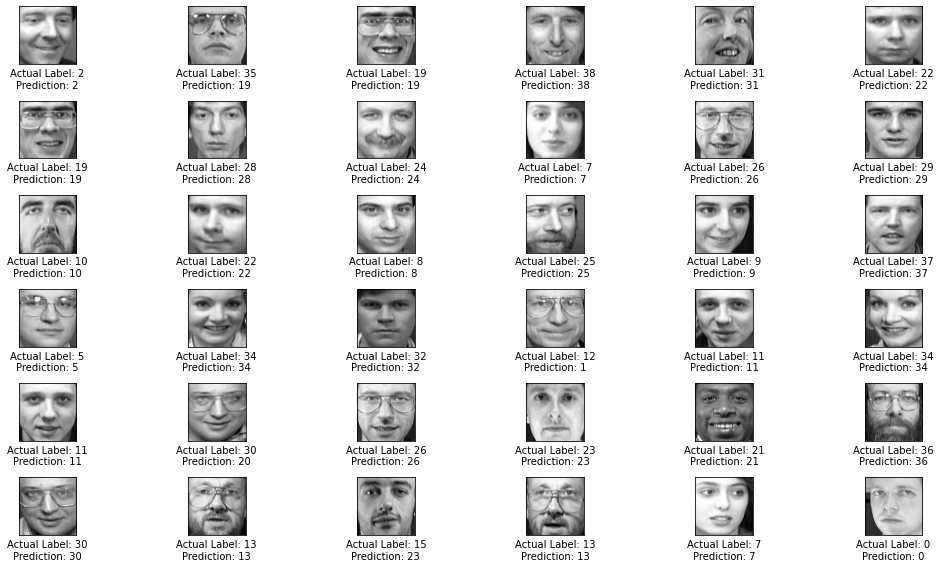

In [43]:
for i in range(36):
    plt.subplot(6, 6, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[i].reshape(64, 64), cmap = 'gray')
    plt.xlabel('Actual Label: {}\nPrediction: {}'.format(y_test[i], y_pred_rf[i]))
plt.tight_layout()
plt.show()

In [44]:
X_test_recovered = pca.inverse_transform(X_test_pca)

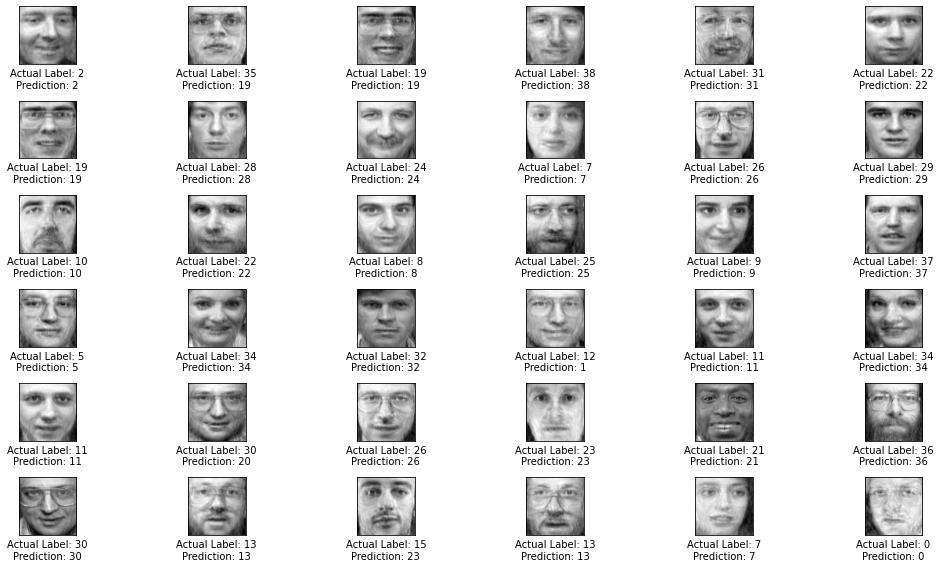

In [45]:
for i in range(36):
    plt.subplot(6, 6, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test_recovered[i].reshape(64, 64), cmap = 'gray')
    plt.xlabel('Actual Label: {}\nPrediction: {}'.format(y_test[i], y_pred_rf[i]))
plt.tight_layout()
plt.show()